
#Automated License Plate Detection with YOLOv8
**ITAI1378 – Computer Vision Midterm Project**  

This Colab notebook trains and evaluates a YOLOv8-based license plate detection model using a Roboflow-exported dataset.


In [2]:

!pip install -q ultralytics roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 80.4 MB/s eta 0:00:00


In [3]:

from ultralytics import YOLO
import os
from pathlib import Path
from IPython.display import Image, display


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.



## Dataset Setup
We'll:
1. Unzip the dataset
2. Locate the data.yaml file
3. Use it to train YOLOv8


In [6]:

# Path to your dataset zip
# Update this if your filename is different
zip_path = "/content/Vehicle Registration Plates.v1-original-images.yolov5pytorch.zip"

if not os.path.exists(zip_path):
    print(f"Zip file not found at: {zip_path}")
    print("→ Make sure the file exists in /content or update 'zip_path' accordingly.")
else:
    print(f"Found dataset zip at: {zip_path}")


Found dataset zip at: /content/Vehicle Registration Plates.v1-original-images.yolov5pytorch.zip


In [7]:

# Unzip the dataset
dataset_root = "/content/datasets"
os.makedirs(dataset_root, exist_ok=True)

if os.path.exists(zip_path):
    !unzip -q "{zip_path}" -d "{dataset_root}"
    print("Dataset unzipped.")
else:
    print("Skipping unzip because zip file was not found.")


Dataset unzipped.


In [9]:

# Try to automatically discover the folder that contains data.yaml
data_yaml_path = None
for root, dirs, files in os.walk(dataset_root):
    if "data.yaml" in files:
        data_yaml_path = os.path.join(root, "data.yaml")
        break

if data_yaml_path:
    print(f" Found data.yaml at: {data_yaml_path}")
else:
    print("Could not find data.yaml. Check your unzip folder structure manually.")
    print("You may need to open the file browser on the left and inspect /content/datasets.")


 Found data.yaml at: /content/datasets/data.yaml



## Train YOLOv8 on License Plate Dataset

We will fine-tune a small YOLOv8 model (`yolov8n.pt`) on the license plate dataset.


In [ ]:

# Choose a YOLOv8 model: 'yolov8n.pt' is a good starting point
model = YOLO("yolov8n.pt")

if data_yaml_path is None:
    raise FileNotFoundError("data.yaml not found. Fix dataset path before training.")

# Training configuration
EPOCHS = 30
IMG_SIZE = 640

results = model.train(
    data=data_yaml_path,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    project="license_plate_runs",
    name="yolov8n_license_plate",
    exist_ok=True,
)


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_license_plate, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

## Evaluate Model Performance

In [12]:

val_results = model.val()
print(val_results)


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 778.4±222.0 MB/s, size: 45.4 KB)
val: Scanning /content/datasets/valid/labels.cache... 1765 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1765/1765 3.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 111/111 8.2it/s 13.5s
                   all       1765       1840      0.985      0.957      0.985       0.72
Speed: 0.9ms preprocess, 2.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f728e2af560>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Pr


## Run Inference on Sample Images

We’ll run predictions on a few images from the validation or test set and visualize the bounding boxes.


In [18]:
# Try to find a sample image from the dataset (e.g., 'valid' or 'test' folder)
sample_image_path = "/content/datasets/test/images/CarLongPlate425_jpg.rf.a155c8ee965daa8553505c4d4e37a88b.jpg"

for split_name in ["valid", "val", "test", "train"]:
    split_dir = None
    for root, dirs, files in os.walk(dataset_root):
        if os.path.basename(root).lower() == split_name:
            split_dir = root
            break
    if split_dir:
        # Pick first image
        for f in os.listdir(split_dir):
            if f.lower().endswith((".jpg", ".jpeg", ".png")):
                sample_image_path = os.path.join(split_dir, f)
                break
    if sample_image_path:
        break

if sample_image_path:
    print(f"Using sample image: {sample_image_path}")
else:
    print("Could not automatically find a sample image. Please update 'sample_image_path' manually.")

Using sample image: /content/LicensePlateSample.jpeg



image 1/1 /content/LicensePlateSample.jpeg: 448x640 1 License_Plate, 6.3ms
Speed: 2.4ms preprocess, 6.3ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/detect/predict
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'License_Plate'}
obb: None
orig_img: array([[[235, 196, 157],
        [235, 196, 157],
        [236, 197, 159],
        ...,
        [223, 176, 125],
        [223, 176, 125],
        [223, 176, 125]],

       [[235, 196, 157],
        [235, 196, 157],
        [236, 197, 159],
        ...,
        [223, 176, 125],
        [222, 175, 124],
        [222, 175, 124]],

       [[235, 196, 157],
        [236, 197, 158],
        [236, 197, 158],
        ...,
        [222, 175, 124],
        [221, 174, 123],
        [221, 174, 123]],

       ...,

       [[105, 106, 104],
        [113, 114, 112],
        [116, 117, 115],
        ...,
  

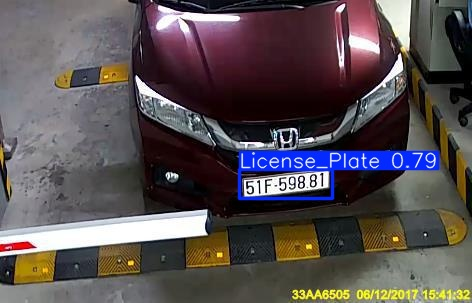

In [19]:

if sample_image_path:
    prediction_results = model.predict(
        source=sample_image_path,
        conf=0.5,
        save=True
    )
    print(prediction_results)

    # Find the saved image with bounding boxesS
    # Ultralytics usually saves to 'runs/detect/predict*'
    detect_root = Path("runs/detect")
    if detect_root.exists():
        latest_run = max(detect_root.iterdir(), key=lambda d: d.stat().st_mtime)
        print(f"Latest detect run: {latest_run}")
        # Try to display first image in that folder
        for f in latest_run.iterdir():
            if f.suffix.lower() in [".jpg", ".jpeg", ".png"]:
                display(Image(filename=str(f)))
                break
    else:
        print("No detect results folder found.")
